im: (256, 256, 3)


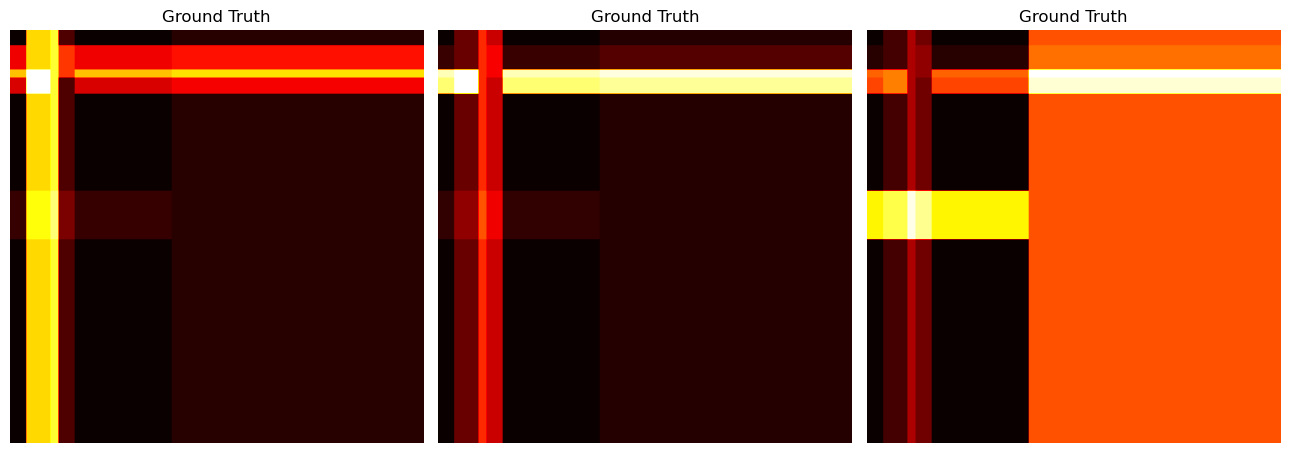

In [2]:
# %load_ext autoreload
# %autoreload 2

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import skimage, glob 
import skimage.exposure

# add .. to os path
import os, sys
sys.path.append("../")

import mosaic_picasso.mosaic as mp
import mosaic_picasso.utils as utils
import importlib 

# importlib.reload(UTILITY_7)
importlib.reload(mp)

# Load demo data of 2 channel 
#f = r"../data/CD8_CD3e_CD4_.tiff"
#f = r"/Users/danieleancora/Documents/GitHub/matisse/data/PICASSO/5-color unmixing simulation/Before unmixing.tif"
#f = r"/Users/danieleancora/Documents/GitHub/matisse/data/PICASSO/3-color unmixing validation/Before unmixing.tif"
#im = skimage.io.imread(f).astype(np.single)



fluo = np.zeros((3,256,256), dtype=np.float32)
imag = np.zeros((3,256,256), dtype=np.float32)
fluo[0,10:30,:] = 1
fluo[0,:,10:30] = 2
fluo[1,25:40,:] = 3
fluo[1,:,25:40] = 1
fluo[2,100:130,:] = 1.5
fluo[2,:,100:] = 1
channels, xdim, ydim = fluo.shape

# %% Producing a fake mixed data
beta = np.asarray([[1.00, 0.30, 0.13],
                   [0.25, 1.00, 0.14],
                   [0.09, 0.32, 1.00]]).astype(dtype=np.float32)
fluo = fluo[0:3,:,:]
channels, xdim, ydim = fluo.shape
im = np.matmul(beta, fluo.reshape(channels, xdim*ydim)).reshape(channels, xdim, ydim)

im = np.moveaxis(im, 0, -1)
print(f'im: {im.shape}')

plt.figure(figsize=(13,13))
for i in range(channels):
    plt.subplot(1,channels,i+1), plt.imshow(im[:,:,i], cmap='hot', vmin=0), plt.axis('off'), plt.title('Ground Truth')
    # plt.subplot(3,channels,i+1+channels), plt.imshow(fluo_rec[i,:,:], cmap='hot', vmin=0), plt.axis('off'), plt.title('Image unmixing')
plt.tight_layout()



In [3]:
# # pre processing
im_drift_corrected = utils.drift_corr(im)
im_drift_corrected_bg_removed = utils.bg_remove(im_drift_corrected)

# call PICASSO
mosaic = mp.MosaicPicasso(bins=256, beta=0, gamma=0.1, cycles=20, nch=3)

# test img 
im_mosaic, P = mosaic.mosaic(im_drift_corrected_bg_removed)


shift: [-0.01 -0.01], img: (256, 256, 3)
shift: [0. 0.], img: (256, 256, 3)


/home/daniele/anaconda3/envs/torch/lib/python3.10/site-packages/skimage/metrics/_structural_similarity.py:230: RuntimeWarning: invalid value encountered in divide
  S = (A1 * A2) / D
/home/daniele/anaconda3/envs/torch/lib/python3.10/site-packages/skimage/metrics/_structural_similarity.py:230: RuntimeWarning: invalid value encountered in divide
  S = (A1 * A2) / D
/home/daniele/Documents/GitHub/mosaic-picasso/notebooks/../mosaic_picasso/mosaic.py:46: RuntimeWarning: invalid value encountered in divide
  hist /= np.sum(hist)  # Normalize the histogram
/home/daniele/Documents/GitHub/mosaic-picasso/notebooks/../mosaic_picasso/mosaic.py:46: RuntimeWarning: invalid value encountered in divide
  hist /= np.sum(hist)  # Normalize the histogram
/home/daniele/anaconda3/envs/torch/lib/python3.10/site-packages/skimage/metrics/_structural_similarity.py:230: RuntimeWarning: divide by zero encountered in divide
  S = (A1 * A2) / D
/home/daniele/anaconda3/envs/torch/lib/python3.10/site-packages/skimag

0,

/home/daniele/Documents/GitHub/mosaic-picasso/notebooks/../mosaic_picasso/mosaic.py:50: RuntimeWarning: invalid value encountered in double_scalars
  return (entropy1 + entropy2 - joint_entropy) / np.maximum(entropy1, entropy2)
/home/daniele/Documents/GitHub/mosaic-picasso/notebooks/../mosaic_picasso/mosaic.py:50: RuntimeWarning: invalid value encountered in double_scalars
  return (entropy1 + entropy2 - joint_entropy) / np.maximum(entropy1, entropy2)


1,

/home/daniele/Documents/GitHub/mosaic-picasso/notebooks/../mosaic_picasso/mosaic.py:50: RuntimeWarning: invalid value encountered in double_scalars
  return (entropy1 + entropy2 - joint_entropy) / np.maximum(entropy1, entropy2)
/home/daniele/Documents/GitHub/mosaic-picasso/notebooks/../mosaic_picasso/mosaic.py:50: RuntimeWarning: invalid value encountered in double_scalars
  return (entropy1 + entropy2 - joint_entropy) / np.maximum(entropy1, entropy2)


2,3,

/home/daniele/anaconda3/envs/torch/lib/python3.10/site-packages/skimage/metrics/_structural_similarity.py:230: RuntimeWarning: divide by zero encountered in divide
  S = (A1 * A2) / D
/home/daniele/anaconda3/envs/torch/lib/python3.10/site-packages/numpy/lib/function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/home/daniele/anaconda3/envs/torch/lib/python3.10/site-packages/numpy/lib/function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/home/daniele/Documents/GitHub/mosaic-picasso/notebooks/../mosaic_picasso/mosaic.py:46: RuntimeWarning: invalid value encountered in divide
  hist /= np.sum(hist)  # Normalize the histogram


4,5,6,7,8,

/home/daniele/anaconda3/envs/torch/lib/python3.10/site-packages/skimage/metrics/_structural_similarity.py:230: RuntimeWarning: divide by zero encountered in divide
  S = (A1 * A2) / D
/home/daniele/anaconda3/envs/torch/lib/python3.10/site-packages/numpy/lib/function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/home/daniele/anaconda3/envs/torch/lib/python3.10/site-packages/numpy/lib/function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/home/daniele/Documents/GitHub/mosaic-picasso/notebooks/../mosaic_picasso/mosaic.py:46: RuntimeWarning: invalid value encountered in divide
  hist /= np.sum(hist)  # Normalize the histogram


9,

/home/daniele/anaconda3/envs/torch/lib/python3.10/site-packages/skimage/metrics/_structural_similarity.py:230: RuntimeWarning: divide by zero encountered in divide
  S = (A1 * A2) / D
/home/daniele/Documents/GitHub/mosaic-picasso/notebooks/../mosaic_picasso/mosaic.py:50: RuntimeWarning: invalid value encountered in double_scalars
  return (entropy1 + entropy2 - joint_entropy) / np.maximum(entropy1, entropy2)
/home/daniele/anaconda3/envs/torch/lib/python3.10/site-packages/skimage/metrics/_structural_similarity.py:230: RuntimeWarning: divide by zero encountered in divide
  S = (A1 * A2) / D
/home/daniele/anaconda3/envs/torch/lib/python3.10/site-packages/numpy/lib/function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/home/daniele/Documents/GitHub/mosaic-picasso/notebooks/../mosaic_picasso/mosaic.py:46: RuntimeWarning: invalid value encountered in divide
  hist /= np.sum(hist)  # Normalize the histogram
/home/daniele/Documents/GitHub/mosa

10,11,

/home/daniele/anaconda3/envs/torch/lib/python3.10/site-packages/skimage/metrics/_structural_similarity.py:230: RuntimeWarning: invalid value encountered in divide
  S = (A1 * A2) / D
/home/daniele/anaconda3/envs/torch/lib/python3.10/site-packages/skimage/metrics/_structural_similarity.py:230: RuntimeWarning: invalid value encountered in divide
  S = (A1 * A2) / D
/home/daniele/Documents/GitHub/mosaic-picasso/notebooks/../mosaic_picasso/mosaic.py:46: RuntimeWarning: invalid value encountered in divide
  hist /= np.sum(hist)  # Normalize the histogram


12,13,14,15,16,17,18,19,

/home/daniele/Documents/GitHub/mosaic-picasso/notebooks/../mosaic_picasso/mosaic.py:50: RuntimeWarning: invalid value encountered in double_scalars
  return (entropy1 + entropy2 - joint_entropy) / np.maximum(entropy1, entropy2)
/home/daniele/Documents/GitHub/mosaic-picasso/notebooks/../mosaic_picasso/mosaic.py:50: RuntimeWarning: invalid value encountered in double_scalars
  return (entropy1 + entropy2 - joint_entropy) / np.maximum(entropy1, entropy2)


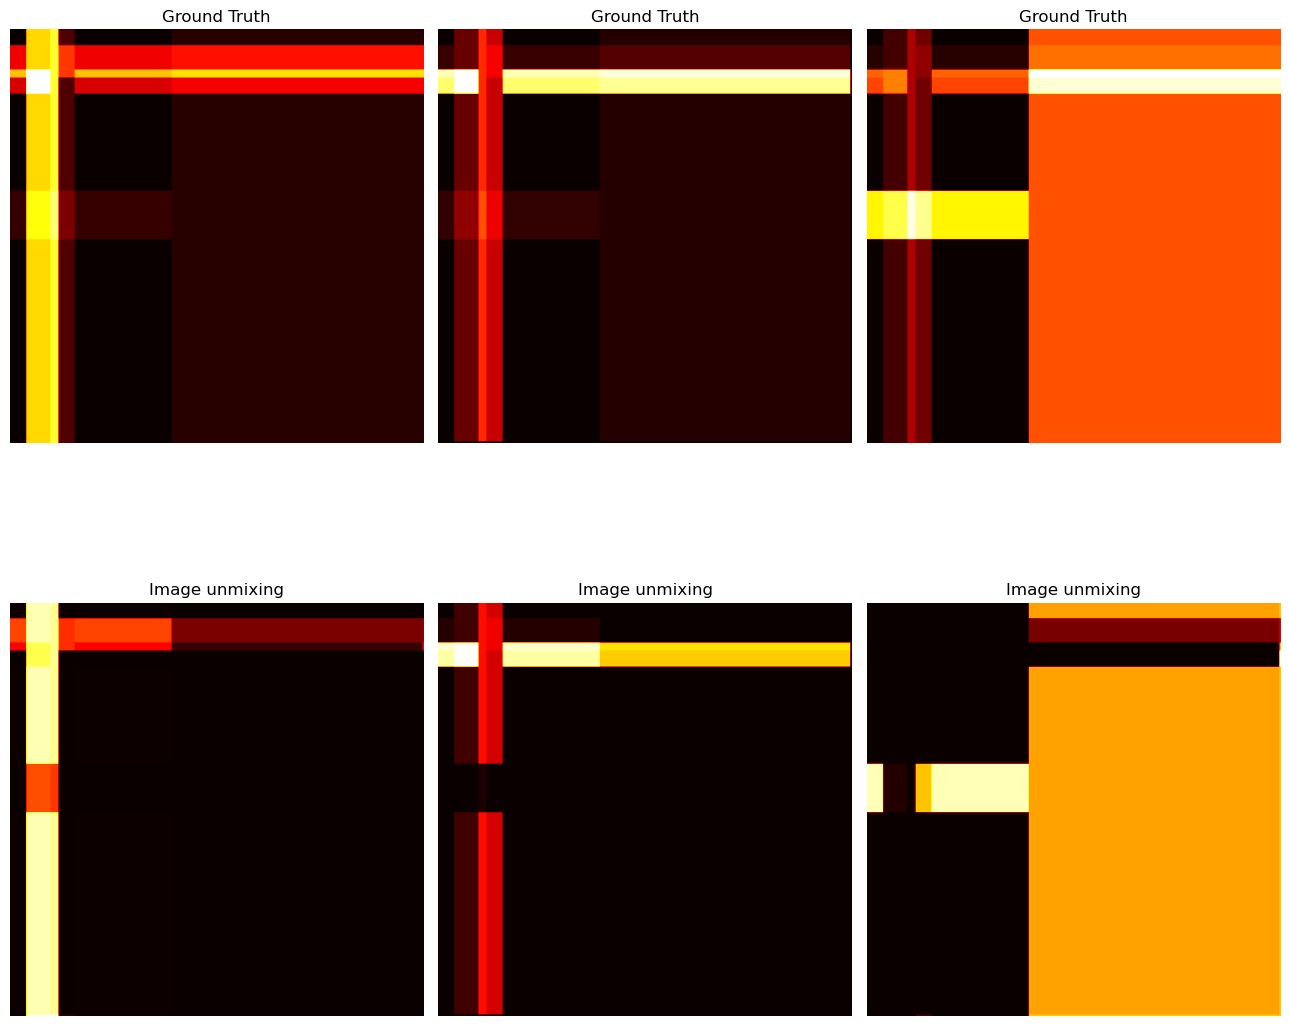

In [4]:
plt.figure(figsize=(13,13))
for i in range(channels):
    plt.subplot(2,channels,i+1), plt.imshow(im[:,:,i], cmap='hot', vmin=0), plt.axis('off'), plt.title('Ground Truth')
    plt.subplot(2,channels,i+1+channels), plt.imshow(im_mosaic[:,:,i], cmap='hot', vmin=0), plt.axis('off'), plt.title('Image unmixing')
plt.tight_layout()

im: (256, 256, 3), im_mosaic: (256, 256, 3)


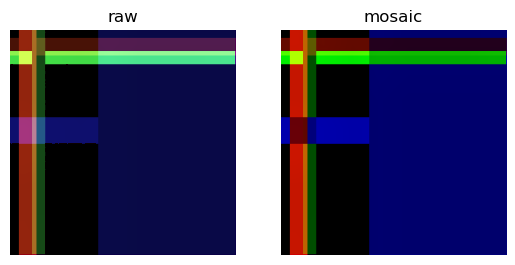

In [6]:
# this is for 3-colors
# show results
print(f'im: {im_drift_corrected.shape}, im_mosaic: {im_mosaic.shape}')

# show rgb
ims = [im/im.max(), im_mosaic/im_mosaic.max()]
ims_rgb = [skimage.exposure.equalize_adapthist(im_a) for im_a in ims]

titles = ['raw', 'mosaic']
fig, axs = plt.subplots(1,2, dpi=100)
for i, im_a in enumerate(ims_rgb):
    axs[i].imshow(im_a)
    axs[i].axis('off')
    axs[i].set_title(titles[i])
plt.show()

In [7]:
# using mapari
import napari 
viewer = napari.Viewer()
viewer.add_image(im_drift_corrected, channel_axis=2, gamma=0.5)
viewer.add_image(ims_rgb, channel_axis=2, gamma=0.5)

labels = ['CD8', 'CD3e', 'CD4']
cmap   = ['red', 'green', 'blue']

for i,l in enumerate(cmap):
    viewer.layers[i].colormap = l
    viewer.layers[i].name = labels[i]


ValueError: Input data should be an array-like object, or a sequence of arrays of decreasing size. Got arrays of single shape: (256, 256, 3)